# Transform Data With Pandas

- we are expolring another aspect about the happiness report that we did not analyze yet, we want to know which factor contributes the most among all of the factors. continue the analysis with happiness report 2015 dataset to check this aspect in short trying to answer one question.

<i> which factor below contributes the most to the happiness score ? </i>

- `Economy`

- `Family`
- `Health`
- `Freedom`
- `Trust`
- `Generosity`

we will refer to the above columns as "factor" columns we will work to answer this question in coming cells. in order to answer this question we have to put the data in a better format to make our job easier

fournately Pandas has some methods and functions that help us in our mission let's dive in and check them. to perform our ask we will explore the below functions and methods

- `Series.map()`

- `Series.apply()`
- `DataFrame.applymap()`
- `DataFrame.apply()`
- `pd.melt()`




In [1]:
# importing tools and reading our dataset 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

# reading 2015 happiness report 
happiness_2015 = pd.read_csv("World_Happiness_2015.csv")
happiness_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


- `Dystopia Residual` - Represents the extent to which the factors over or under explain the happiness score just for clarification we will not need a depth knowledge about this column

- Now let's work only with the factors we want, so are gonna choose he factors only from our dataframe ,

In [2]:
happiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [3]:
# renaming some factors before choosing 
mapping = {
    'Health (Life Expectancy)' : "Health", 
    'Economy (GDP per Capita)' : "Economy" , 
    'Trust (Government Corruption)' : "Trust"
}

happiness_2015.rename(mapper = mapping , axis = 1 , inplace = True)

In [4]:
# drop region and rank for now
happiness_2015 = happiness_2015.drop(["Region" , "Happiness Rank" ], axis= 1)

In [5]:
happiness_2015.head()

,Country,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


- Now all the columns with this continous data points are very hard to analyze whether we can convert these numbers to categories that indicate whether the factor has a high impact on the happiness score or low impact


- Applying a Function Element Wise using `map` and `apply` functions .

- Element Wise function means the function will take one value and convert it to what you want or ehat your telling it to do

- For instance build a simple function to apply it on the variables of any column of factors 

In [6]:
# for example 
def label(value):
    if value > 1:
        return "High"
    else:
        return "Low"

    
label(1.5)

'High'

In [7]:
# apply label function on Family
family = happiness_2015["Family"]

# now the first method to use Series.map()
family_impact = family.map(label)
family_impact

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Family, Length: 158, dtype: object

In [8]:
family_impact.value_counts()

High    89
Low     69
Name: Family, dtype: int64

In [9]:
# trying another method doing the same job Series.apply()
family_impact_apply = family.apply(label)
family_impact_apply.value_counts()

High    89
Low     69
Name: Family, dtype: int64

In [10]:
economy_impact = happiness_2015["Economy"].map(label)
eco_impact_apply = happiness_2015["Economy"].apply(label)

# check if the both Series havve the same values
economy_impact.equals(eco_impact_apply)

True

- Although both methods `map` , `apply` produces the same results there main difference between them `map` method accepts only function with no more than one argument like `label` , but `apply`

let's modify our function `label` and apply both nethods again


In [11]:
# modift the function

def label(element, x):
    if element > x:
        return "High"
    else:
        return "Low"
    
label(5 , 1)

'High'

when applying `map` -> `happiness_2015["Economy"].map(label , x = 1)` method we get this error 

`TypeError: map() got an unexpected keyword argument 'x'`

In [12]:
# apply method
family = happiness_2015["Family"]
family.apply(label, x= 1)

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Family, Length: 158, dtype: object

In [13]:
economy_impact_apply = happiness_2015["Economy"].apply(label, x= 0.8)

economy_impact_apply.value_counts()

High    93
Low     65
Name: Economy, dtype: int64

- applying the same function `label` for multiple columns to see the impact of each column

In [14]:
family_impact = happiness_2015["Family"].apply(label, x= 0.8)
health_impact = happiness_2015["Health"].apply(label , x = 0.8)

health_impact

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Health, Length: 158, dtype: object

- The same for any numbers of columns but if we have very number of columns this is impractical and forunately Pandas has another method `applymap` to apply the same function on multiple columns

In [15]:
def label(element):
    if element > 1:
        return "High"
    else:
        return "Low"
    
factors = ["Economy" , "Family" , "Health" , "Freedom" , "Trust" , "Generosity"]

happiness_2015[factors]

,Economy,Family,Health,Freedom,Trust,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [16]:
# apply on this dataframe 
factors_impact = happiness_2015[factors].applymap(label)

factors_impact.head(6)

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low
5,High,High,Low,Low,Low,Low


From only the six rows above we can observe that `Economy` , and `Family` had a high impact on the happiness score of the first 6 columns

- Now time to use another `apply` method we used ine with Series and now we will use `apply` method with a DataFrame to apply functions along an Axis either column-wise or row-wise



In [17]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


Now we can see that the `Family` , `Economy` contain the most high values 

when we applies `pd.value_counts` function it took each column and calculated the frequency of the unique values one by one 
but this is only possiple because the `pd.value_counts` function operate in row-wise or column wise (on a Series) ut if the function is element wise it does ot work

- Now we are gonna calculate the percentages or actuallu convert the values o percentage 
1. build functio to convert the values
2. use a method to apply the function on the values

In [18]:
# function for calculating percentages 
def v_counts(col):
    num = col.value_counts()
    size = col.size
    
    return (num / size)

In [19]:
# using apply() method to apply this function n our factors 

factors_impact.apply(v_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


- Now it converted the values to percentages, now let's get a note about our main values again

In [20]:
happiness_2015

,Country,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


- The sum of the six factors and the `	Dystopia Residual` equals the `Happiness Score`

In [21]:
# calculate the sum of factor columns in each row 
happiness_2015["Factors Sum"] = happiness_2015[["Economy" , "Family" , "Trust" , "Generosity" , 
                                                "Freedom" , "Health" , "Dystopia Residual"]].sum(axis = 1)

happiness_2015[["Happiness Score" ,  "Factors Sum"]]

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694
...,...,...
153,3.465,3.46504
154,3.340,3.34009
155,3.006,3.00629
156,2.905,2.90454


## Screen 6
- let's create a function that converts the values to percentages again and round the 
---------------------------------------------------------------------------------------------------

**Melt Function**

let's see how to reshape data using `pd.melt` function

In [22]:
pd.melt(frame = happiness_2015, id_vars= ["Country" , "Happiness Score"] ,
        value_vars = ["Economy" , "Family" , "Freedom" , "Trust"])

,Country,Happiness Score,variable,value
0,Switzerland,7.587,Economy,1.39651
1,Iceland,7.561,Economy,1.30232
2,Denmark,7.527,Economy,1.32548
3,Norway,7.522,Economy,1.45900
4,Canada,7.427,Economy,1.32629
...,...,...,...,...
627,Rwanda,3.465,Trust,0.55191
628,Benin,3.340,Trust,0.08010
629,Syria,3.006,Trust,0.18906
630,Burundi,2.905,Trust,0.10062


In [23]:
main_cols = ["Country" ,  "Happiness Score" ]

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity' , 'Dystopia Residual']

melted = pd.melt(frame = happiness_2015 , id_vars= main_cols , value_vars= factors)
melted

,Country,Happiness Score,variable,value
0,Switzerland,7.587,Economy,1.39651
1,Iceland,7.561,Economy,1.30232
2,Denmark,7.527,Economy,1.32548
3,Norway,7.522,Economy,1.45900
4,Canada,7.427,Economy,1.32629
...,...,...,...,...
1101,Rwanda,3.465,Dystopia Residual,0.67042
1102,Benin,3.340,Dystopia Residual,1.63328
1103,Syria,3.006,Dystopia Residual,0.32858
1104,Burundi,2.905,Dystopia Residual,1.83302


- As we can see above we put all values of factors in just one column this column we can apply any function on its values now more easily let's see how

- If we divide the values of `value` column by the `Happiness Score` column we get the ratio or percentage of each value 

In [24]:
melted["Percentages"] = melted["value"] / melted["Happiness Score"]

melted

,Country,Happiness Score,variable,value,Percentages
0,Switzerland,7.587,Economy,1.39651,0.184066
1,Iceland,7.561,Economy,1.30232,0.172242
2,Denmark,7.527,Economy,1.32548,0.176097
3,Norway,7.522,Economy,1.45900,0.193964
4,Canada,7.427,Economy,1.32629,0.178577
...,...,...,...,...,...
1101,Rwanda,3.465,Dystopia Residual,0.67042,0.193483
1102,Benin,3.340,Dystopia Residual,1.63328,0.489006
1103,Syria,3.006,Dystopia Residual,0.32858,0.109308
1104,Burundi,2.905,Dystopia Residual,1.83302,0.630988


In [25]:
# round the values and convert to percentage 
melted["Percentages"] = round((melted["value"] / melted["Happiness Score"]) * 100 , 2)

melted

,Country,Happiness Score,variable,value,Percentages
0,Switzerland,7.587,Economy,1.39651,18.41
1,Iceland,7.561,Economy,1.30232,17.22
2,Denmark,7.527,Economy,1.32548,17.61
3,Norway,7.522,Economy,1.45900,19.40
4,Canada,7.427,Economy,1.32629,17.86
...,...,...,...,...,...
1101,Rwanda,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,2.905,Dystopia Residual,1.83302,63.10


In [26]:
melted.groupby(by = ["variable"]).agg("mean")

,Happiness Score,value,Percentages
variable,,,
Dystopia Residual,5.375734,2.098977,39.668038
Economy,5.375734,0.846137,15.144494
Family,5.375734,0.991046,18.427468
Freedom,5.375734,0.428615,8.027975
Generosity,5.375734,0.237296,4.565316
Health,5.375734,0.630259,11.524494
Trust,5.375734,0.143422,2.643165


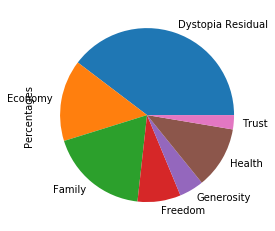

In [27]:
percentages = melted.groupby(by = "variable").agg("mean")

percentages["Percentages"].plot(kind = "pie" , legend = False )

In [28]:
# piv_melt = melt.pivot_table(index = "variable" , values = "value" , aggfunc= "mean")

# piv_melt.plot(kind = "pie" , y = "value" , legend = False, figsize = (10,7))

**If we disregard `Dystopia Residual` we observe that `Economy`, and `Family` contribute the most for the hHappiness Score**